# Análise de Séries Temporais do Saldo em juros flutuantes DI de depósitos a prazo (CDB/RDB) - Pessoas físicas

Os valores da série temporal 'Saldo em juros flutuantes DI de depósitos a prazo (CDB/RDB) - Pessoas físicas' representam o montante total investido em Certificados de Depósitos Bancários (CDB) e Recibos de Depósitos Bancários (RDB) atrelados ao DI por pessoas físicas. O saldo é a soma dos valores nominais de captação de todos os papéis negociados até o dia de referência, cujo vencimento ainda não foi atingido.

Basicamente, o saldo é tudo o que foi investido até o momento em CDBs atrelados ao DI e que ainda está em vigor, ou seja, que não foi resgatado. Não inclui prêmios a serem pagos, mas sim os valores nominais do investimento feitos pelas pessoas físicas em títulos atrelados ao DI.

No caso dos CDBs atrelados ao DI, o rendimento é pós-fixado, ou seja, a remuneração é vinculada a um percentual da taxa DI. Isso significa que o rendimento dos CDBs flutua diariamente conforme as variações na taxa DI, sendo ajustado de acordo com o mercado. Cada dia, o saldo cresce com base nos juros acumulados do percentual da taxa DI pactuado no contrato do CDB.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from arch import arch_model


### Leitura e Visualização dos dados

In [9]:
# Carregar a série temporal
data = pd.read_csv('Saldo em juros flutuantes DI de depositos a prazo (CDBRDB) - Pessoas fisicas.csv', encoding='ISO-8859-1', sep=';', parse_dates=['Data'], index_col='Data')


In [10]:
# Converte a coluna removendo pontos e trocando a vírgula por ponto
data['1168 - Saldo em juros flutuantes DI de depositos a prazo (CDBRDB) - Pessoas fisicas - u.m.c. (mil)'] = (
    data['1168 - Saldo em juros flutuantes DI de depositos a prazo (CDBRDB) - Pessoas fisicas - u.m.c. (mil)']
    .str.replace('.', '', regex=False)  # Remove os pontos
    .str.replace(',', '.', regex=False)  # Troca a vírgula por ponto
    .astype(float)                       # Converte para float
)

# Verifica a conversão
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5020 entries, 02/01/2004 to 29/12/2023
Data columns (total 1 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   1168 - Saldo em juros flutuantes DI de depositos a prazo (CDBRDB) - Pessoas fisicas - u.m.c. (mil)  5020 non-null   float64
dtypes: float64(1)
memory usage: 78.4+ KB
None
            1168 - Saldo em juros flutuantes DI de depositos a prazo (CDBRDB) - Pessoas fisicas - u.m.c. (mil)
Data                                                                                                          
02/01/2004                                        19436701.72                                                 
05/01/2004                                        19459816.07                                                 
06/01/

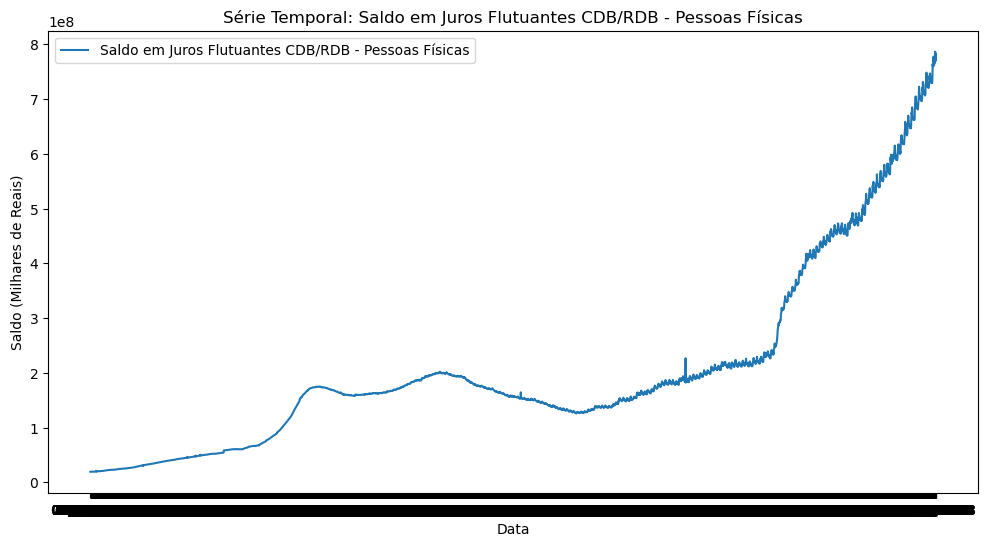

In [11]:

# Visualização inicial
plt.figure(figsize=(12,6))
plt.plot(data, label='Saldo em Juros Flutuantes CDB/RDB - Pessoas Físicas')
plt.title('Série Temporal: Saldo em Juros Flutuantes CDB/RDB - Pessoas Físicas')
plt.xlabel('Data')
plt.ylabel('Saldo (Milhares de Reais)')
plt.legend()
plt.show()


### Decomposição da Série Temporal

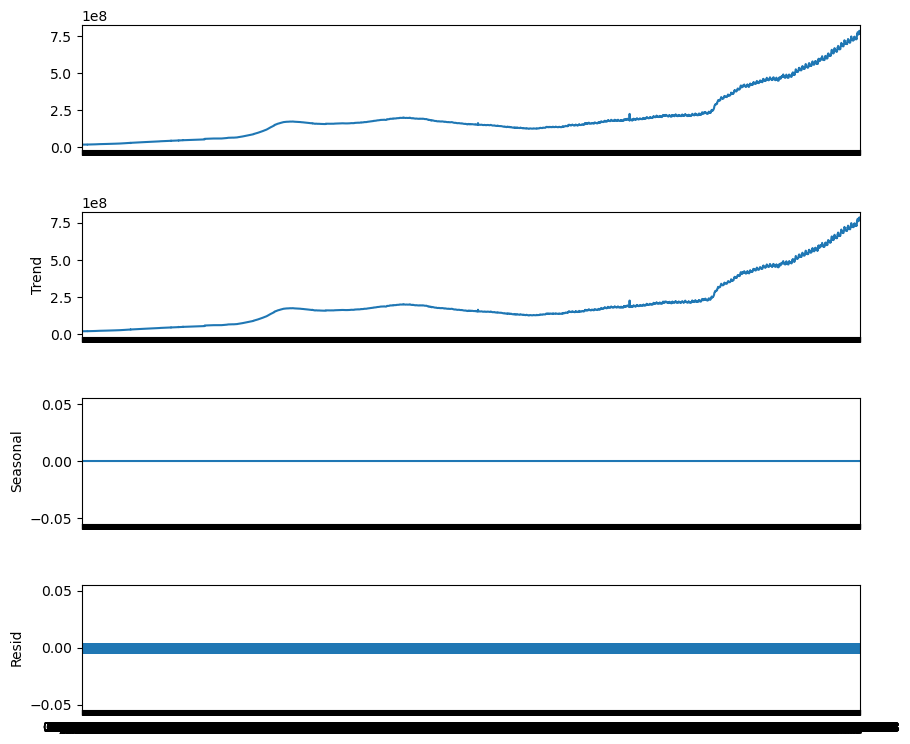

In [19]:
# Decomposição da série
decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=1)

# Plotando decomposição
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()


### Correlograma e PACF com Intervalo de Confiança


Correlograma para autocorrelação (ACF) e autocorrelação parcial (PACF) com intervalos de confiança de 95%:

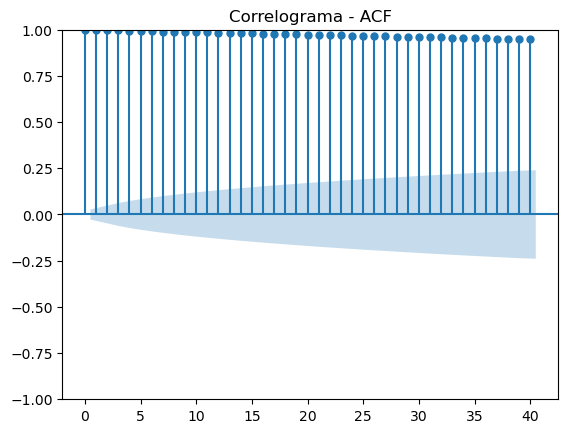

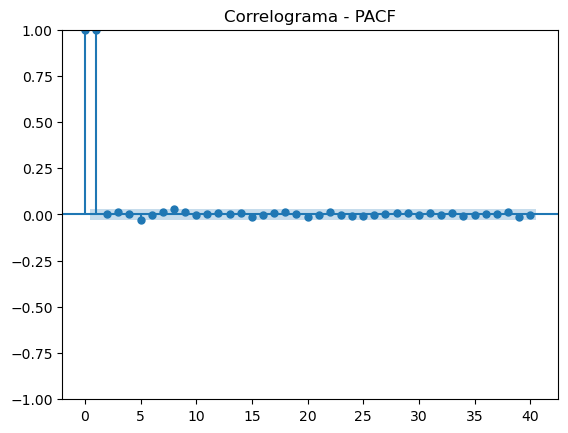

In [13]:
# Correlograma ACF
plot_acf(data, lags=40)
plt.title('Correlograma - ACF')
plt.show()

# Correlograma PACF
plot_pacf(data, lags=40)
plt.title('Correlograma - PACF')
plt.show()


### Teste de Estacionariedade (ADF Test)

Aplicamos o teste de Dickey-Fuller para verificar se a série é estacionária:

In [14]:
from statsmodels.tsa.stattools import adfuller

# Teste ADF
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: 4.396895
p-value: 1.000000
Critial Values:
   1%, -3.4316614186797896
Critial Values:
   5%, -2.8621195049660733
Critial Values:
   10%, -2.567078471244475


Se o p-valor for menor que 0.05, a série é estacionária, caso contrário, podemos aplicar uma diferenciação:

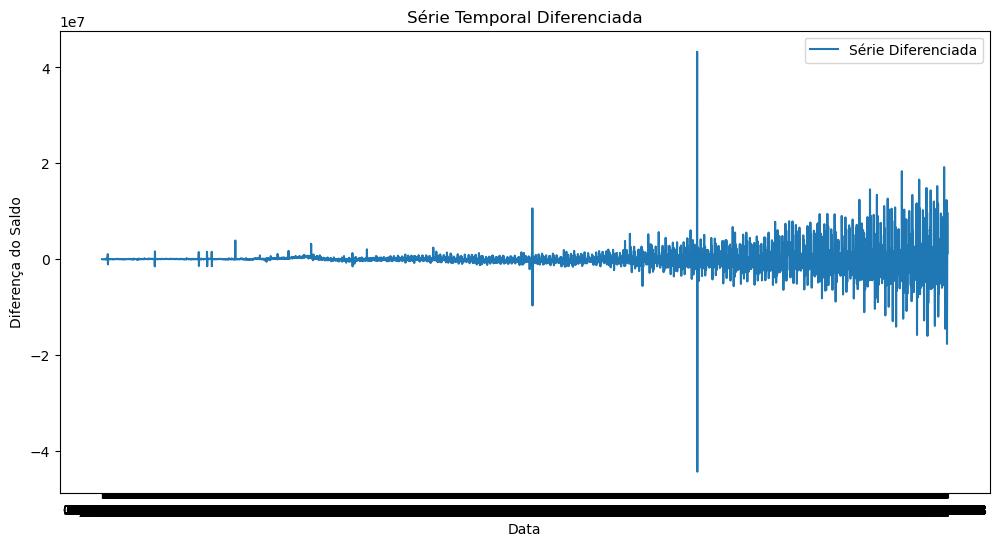

In [18]:
# Diferenciando os dados
data_diff = data.diff().dropna()

# Plotando a série diferenciada
plt.figure(figsize=(12,6))
plt.plot(data_diff, label='Série Diferenciada')
plt.title('Série Temporal Diferenciada')
plt.xlabel('Data')
plt.ylabel('Diferença do Saldo')
plt.legend()
plt.show()


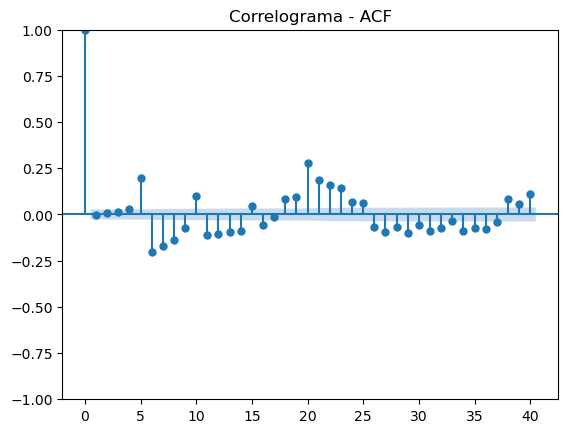

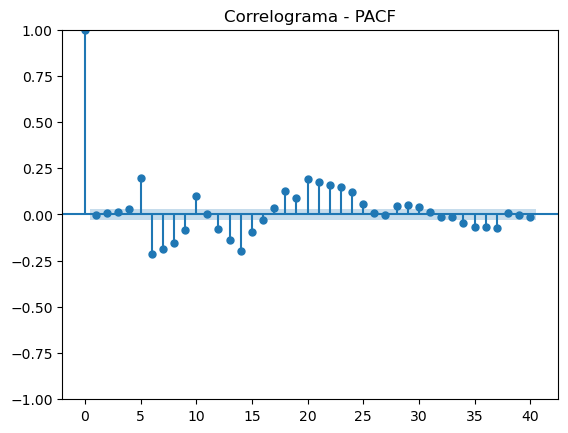

In [20]:
# Correlograma ACF
plot_acf(data_diff, lags=40)
plt.title('Correlograma - ACF')
plt.show()

# Correlograma PACF
plot_pacf(data_diff, lags=40)
plt.title('Correlograma - PACF')
plt.show()


###  Modelo Auto ARIMA

Agora utilizamos o auto_arima para selecionar o melhor modelo ARIMA automaticamente com base em AIC:

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=164136.425, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=162677.468, Time=0.21 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=164134.426, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=162058.961, Time=0.29 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=161699.536, Time=0.51 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=161063.285, Time=0.73 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=161034.263, Time=1.03 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=161035.922, Time=3.67 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=161038.315, Time=1.94 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=161032.259, Time=0.94 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=161061.281, Time=0.71 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=161033.918, Time=2.50 sec
 ARIMA(4,2,1)(0,0,0

c:\Users\gustavo.j.siebel\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gustavo.j.siebel\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x0000024E63C55250>.

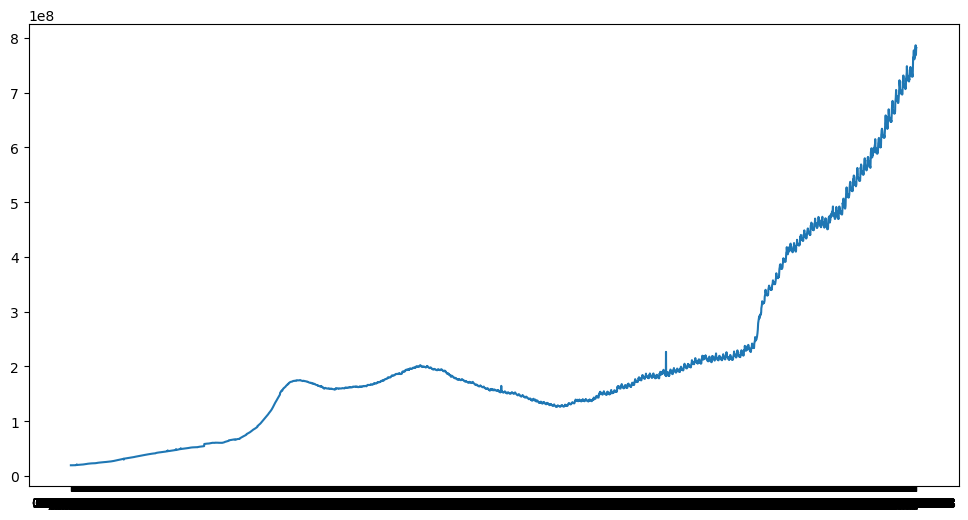

In [21]:
# Modelo Auto ARIMA
auto_arima_model = auto_arima(data, seasonal=False, trace=True,
                              error_action='ignore', suppress_warnings=True, stepwise=True)

# Resumo do modelo
print(auto_arima_model.summary())

# Ajuste do modelo ARIMA
model_fit = auto_arima_model.fit(data)

# Previsões
forecast = model_fit.predict(n_periods=30)
plt.figure(figsize=(12,6))
plt.plot(data, label='Série Original')
plt.plot(pd.date_range(data.index[-1], periods=30, freq='D'), forecast, label='Previsão', color='red')
plt.title('Previsão com Auto ARIMA')
plt.xlabel('Data')
plt.ylabel('Saldo')
plt.legend()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=164136.425, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=162663.828, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=164134.425, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=162045.180, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=161684.112, Time=0.29 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=161041.082, Time=0.35 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=161010.949, Time=0.41 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=161012.617, Time=2.79 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=161015.292, Time=2.27 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=161008.949, Time=0.40 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=161039.082, Time=0.37 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=161010.618, Time=2.93 sec
 ARIMA(4,1,1)(0,0,0

c:\Users\gustavo.j.siebel\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gustavo.j.siebel\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x0000024E2BC27450>.

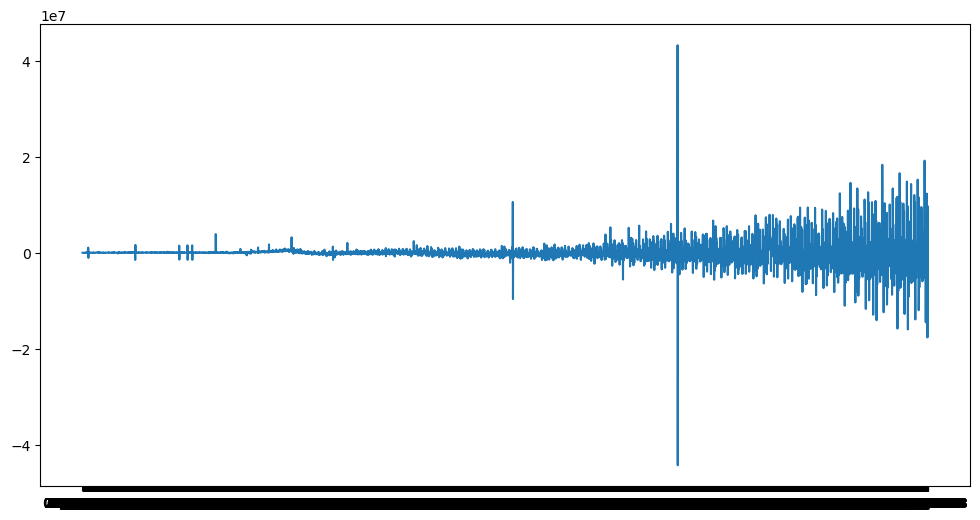

In [22]:
# Modelo Auto ARIMA série diferenciada
auto_arima_model = auto_arima(data_diff, seasonal=False, trace=True,
                              error_action='ignore', suppress_warnings=True, stepwise=True)

# Resumo do modelo
print(auto_arima_model.summary())

# Ajuste do modelo ARIMA
model_fit = auto_arima_model.fit(data_diff)

# Previsões
forecast = model_fit.predict(n_periods=30)
plt.figure(figsize=(12,6))
plt.plot(data_diff, label='Série Original')
plt.plot(pd.date_range(data_diff.index[-1], periods=30, freq='D'), forecast, label='Previsão', color='red')
plt.title('Previsão com Auto ARIMA')
plt.xlabel('Data')
plt.ylabel('Saldo')
plt.legend()
plt.show()


### Modelo GARCH
O modelo GARCH é adequado para capturar a volatilidade na série temporal, que pode ser comum em séries financeiras:

In [ ]:
# Modelo GARCH
garch_model = arch_model(data_diff, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()
print(garch_fit.summary())

# Previsão da volatilidade
garch_forecast = garch_fit.forecast(horizon=30)
plt.figure(figsize=(12,6))
plt.plot(garch_forecast.variance[-1:], label='Volatilidade Prevista')
plt.title('Previsão de Volatilidade com GARCH')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.legend()
plt.show()


### Avaliação do Modelo com Cross-Validation

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Validação cruzada para séries temporais
tscv = TimeSeriesSplit(n_splits=5)
errors = []

for train_index, test_index in tscv.split(data):
    train, test = data.iloc[train_index], data.iloc[test_index]
    model = auto_arima(train, seasonal=False, stepwise=True)
    predictions = model.predict(n_periods=len(test))
    error = mean_squared_error(test, predictions)
    errors.append(error)

print(f'Mean Squared Error: {np.mean(errors)}')
